In [1]:
pip install web3


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplot


Note: you may need to restart the kernel to use updated packages.


In [3]:
from web3 import Web3
web3 = Web3(Web3.HTTPProvider('https://mainnet.infura.io/v3/ce0ca388247e466fb12097b7bd1a6bf0'))

In [4]:
n = 8961400 - 1000 * (46 - 2)

In [5]:
%%time

blocks_gas = []
blocks_gasPrice = []
blocks_contracts = []
for i in range(100):
  gas = []
  price = []
  number_of_calls = 0
  for trans in web3.eth.getBlock(n + i)['transactions']:
    tr = web3.eth.getTransaction(trans)
    tr_receipt = web3.eth.getTransactionReceipt(trans)
    gas.append(tr_receipt['gasUsed'])
    price.append(tr['gasPrice'])
    if tr['input'] != '0x':
      number_of_calls+=1
    
  blocks_gas.append(gas)
  blocks_gasPrice.append(price)
  blocks_contracts.append(number_of_calls)

CPU times: user 2min 33s, sys: 3.77 s, total: 2min 37s
Wall time: 47min 46s


In [6]:
file = open('Blocks_info.txt', 'w')
n = 8961400 - 1000 * (46 - 2)
blocks_commission = []
blocks_relative_commission = []
blocks_num = []
trans_count = []

for i in range (100):
  commission = 0
  trans_c = len(blocks_gas[i])
  for j in range(len(blocks_gas[i])):
    commission += (blocks_gas[i][j]*blocks_gasPrice[i][j])*(10**(-18))
  blocks_num.append(n+i)
  blocks_relative_commission.append(float("{0:.2f}".format(commission*100/(commission + 2))))
  blocks_commission.append(float ("{0:.2f}".format(commission + 2)))
  trans_count.append(trans_c)
  file.write(str(i + n) + ',' + str(commission + 2) + ',' + str(commission*100/(commission + 2)) + ',' + str(trans_c) + ','
             + str(blocks_contracts[i]) + '\n')  
file.close()

In [7]:
import matplotlib.pyplot as plt


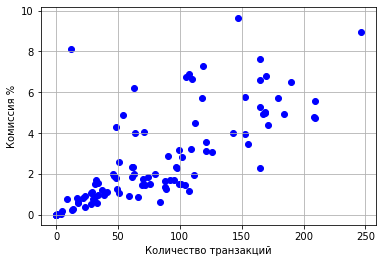

In [8]:
plt.scatter(trans_count, blocks_relative_commission, color = 'blue')
plt.xlabel('Количество транзакций')
plt.ylabel('Комиссия %')
plt.grid()
plt.show()

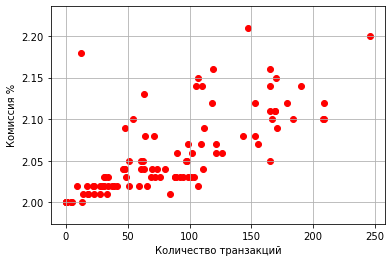

In [9]:
plt.scatter(trans_count, blocks_commission, color = 'red')
plt.xlabel('Количество транзакций')
plt.ylabel('Комиссия %')
plt.grid()
plt.show()

In [10]:
import numpy as np

In [11]:
mean = np.mean(blocks_commission)
median = np.median(blocks_commission)
scope = np.max(blocks_commission) - np.min(blocks_commission)
D = np.var(blocks_commission)
std = np.std(blocks_commission)

print('Математическое ожидание: {} \nМедиана: {} \nРазмах: {} \nДисперсия: {}\nCреднеквадратичное отклонение: {}'.format(mean, median, scope, D, std))

Математическое ожидание: 2.0582000000000003 
Медиана: 2.04 
Размах: 0.20999999999999996 
Дисперсия: 0.002470760000000005
Cреднеквадратичное отклонение: 0.049706739985639826


In [12]:
print(blocks_contracts)

[46, 71, 0, 11, 23, 114, 21, 36, 49, 29, 26, 45, 19, 74, 12, 55, 34, 66, 9, 103, 27, 53, 83, 0, 46, 83, 36, 86, 138, 22, 23, 4, 94, 91, 0, 52, 91, 105, 28, 126, 130, 207, 111, 88, 47, 72, 0, 48, 38, 102, 8, 124, 54, 100, 51, 29, 3, 71, 82, 64, 15, 126, 104, 26, 56, 63, 24, 54, 61, 78, 46, 89, 129, 29, 134, 80, 124, 0, 58, 94, 72, 119, 15, 109, 7, 38, 112, 21, 16, 102, 37, 86, 67, 37, 131, 56, 29, 63, 28, 84]
